In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [528]:
hour = pd.read_csv('hour.csv')
day = pd.read_csv('day.csv')

In [14]:
# Coerce the datatype of “season”,”holiday”,”workingday” and weather to categorical datatype

In [18]:
hour=hour.astype({'season':'category'})

In [19]:
hour= hour.astype({'holiday':'category'})

In [20]:
hour= hour.astype({'workingday':'category'})

In [21]:
hour= hour.astype({'weathersit':'category'})

In [22]:
hour.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth             int64
hr               int64
holiday       category
weekday          int64
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [184]:
hour_year_1 = hour[hour.yr == 0].reset_index(drop=True)
hour_year_2 = hour[hour.yr == 1].reset_index(drop=True)

In [186]:
# Outlier Analysis

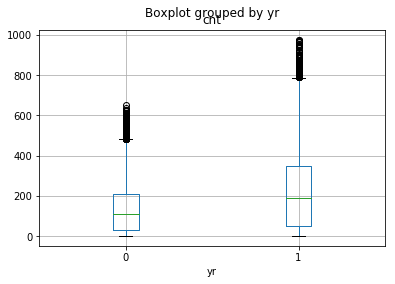

In [532]:
hour_of_day_cnt=hour.boxplot(column='cnt', by='yr')

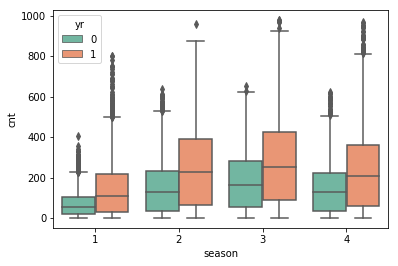

In [188]:
by_season=sns.boxplot(x = 'season',y='cnt',data =hour,hue="yr", palette="Set2")

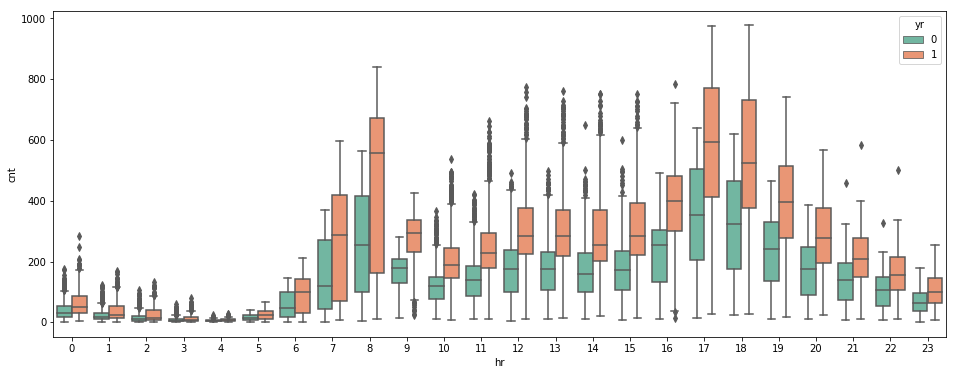

In [566]:
plt.figure(figsize=(16, 6))
by_hour=sns.boxplot(x = 'hr',y='cnt',data =hour,hue="yr", palette="Set2")

In [562]:
hour_year_1.cnt.median()

109.0

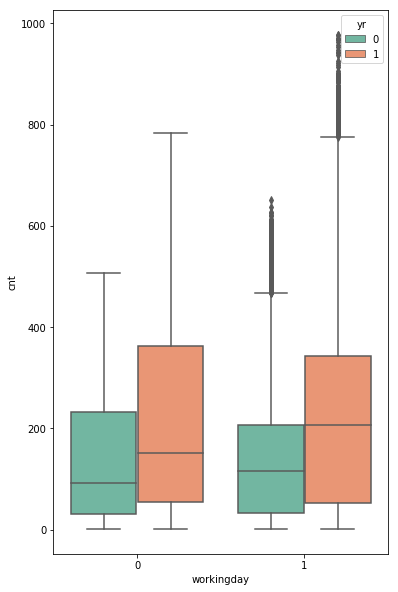

In [534]:
plt.figure(figsize=(6, 10))
by_hour=sns.boxplot(x = 'workingday',y='cnt',data =hour,hue="yr", palette="Set2")

In [191]:
# Spring season has got relatively lower count. The dip in median value in box plot gives evidence for it.
# The median value at 8a.m. and 5-6 p.m. are much higher due to regular school and office users
# All of the outlier points are contributed by the working days

In [192]:
#--------------------------------------------------------------------------------------------------------

In [193]:
# Correlation Analysis

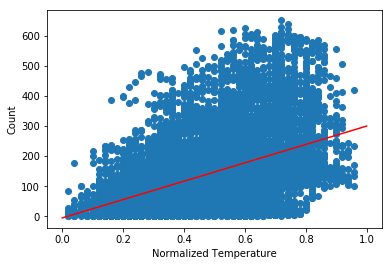

In [536]:
_=plt.scatter('temp','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.temp,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Temperature')
_ = plt.ylabel('Count')
plt.show()

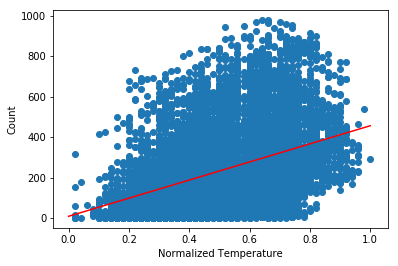

In [537]:
_=plt.scatter('temp','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.temp,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Temperature')
_ = plt.ylabel('Count')
plt.show()

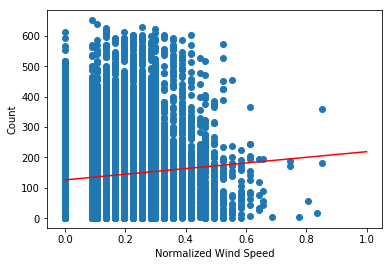

In [538]:
plt.scatter('windspeed','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.windspeed,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
plt.show()

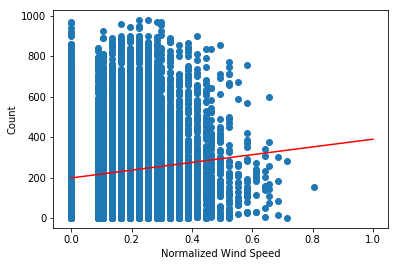

In [540]:
plt.scatter('windspeed','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.windspeed,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
plt.show()

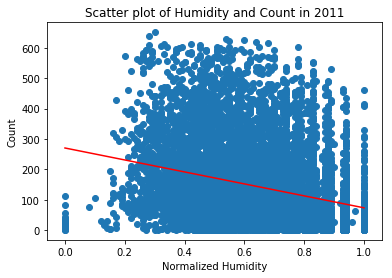

In [574]:
plt.scatter('hum','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.hum,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Humidity')
_ = plt.ylabel('Count')
_ = plt.title('Scatter plot of Humidity and Count in 2011')
plt.show()

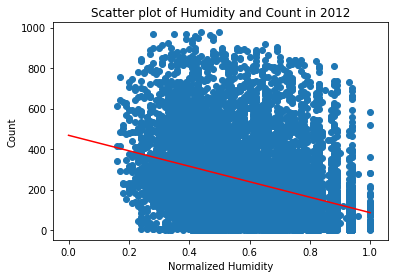

In [575]:
plt.scatter('hum','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.hum,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Humidity')
_ = plt.ylabel('Count')
_ = plt.title('Scatter plot of Humidity and Count in 2012')

plt.show()

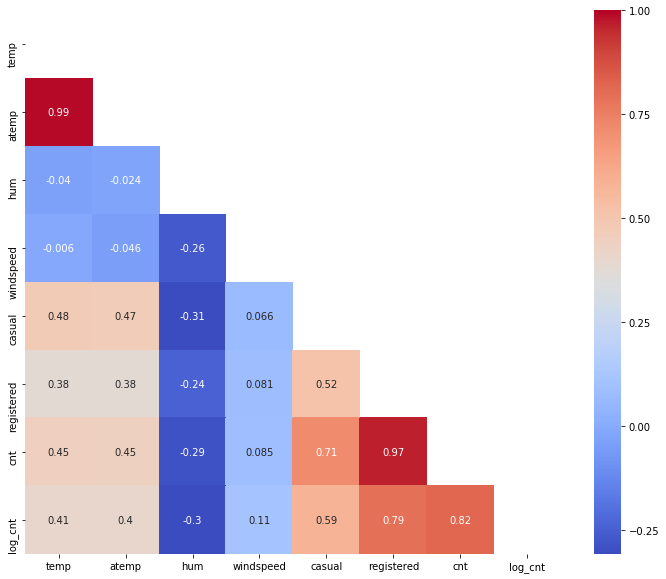

In [200]:
corr = hour_year_1.drop(['instant','yr','mnth','hr','weekday','log_cnt',],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);



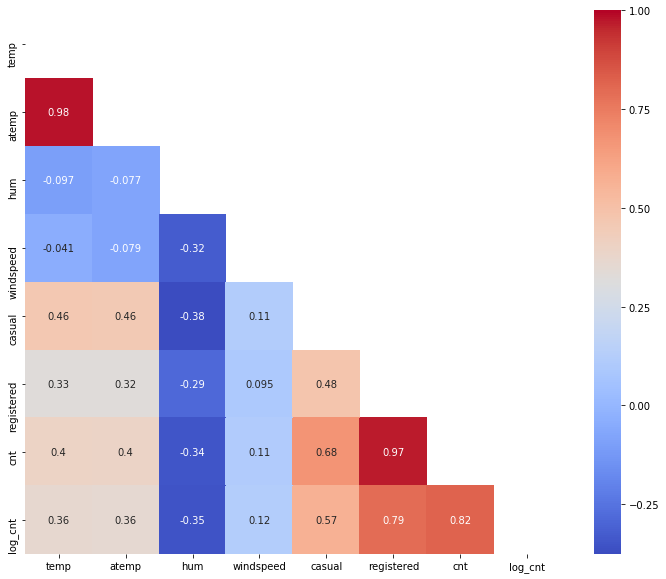

In [201]:
corr = hour_year_2.drop(['instant','yr','mnth','hr','weekday'log_cnt,],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);


In [202]:
# “temp” and “humidity” features have positive and negative correlation with count respectively. 
# Although the correlations between them are not very prominent, 
# still the count variable has got little dependency on “temp” and “humidity”.
# “windspeed” is not going to be a really useful numerical feature 
# and that is visible from the correlation value with “count”, 0.085 and 0.11 for year of 2011 and 2012 respectively.
# “atemp” variable is not taken into account since “atemp” and “temp” has strong correlation with each other. 
# During model building any one of the variables has to be dropped since they will exhibit multicollinearity in the data.
# “casual” and “registered” attributes are also not taken into account 
# since they are leakage variables in nature and need to be dropped during model building.

In [203]:
#--------------------------------------------------------------------------------------------------------

In [204]:
# Visualizing Distribution Of Independent Variable

In [576]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2011')

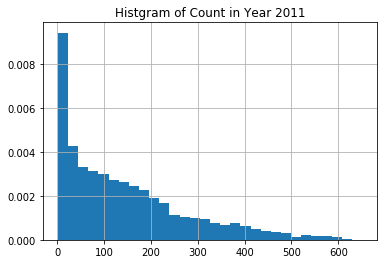

In [553]:
hour_year_1.cnt.hist(bins = 30,normed = True)
plt.title('Histgram of Count in Year 2011')

Text(0, 0.5, 'ECDF')

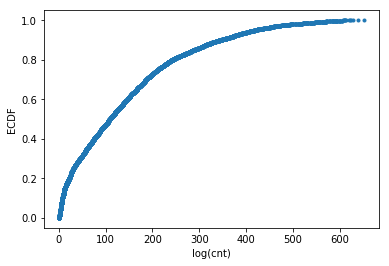

In [586]:
x1,y1 = ecdf(hour_year_1.cnt)
plt.plot(x1,y1,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [393]:
#Remove Outlier
IQR1 = hour_year_1.cnt.quantile(q=0.75, interpolation='linear')-hour_year_1.cnt.quantile(q=0.25, interpolation='linear')
lower_outlier_1 =  hour_year_1.cnt.quantile(q=0.25, interpolation='linear') - 1.5* IQR1
higher_outlier_1 =  hour_year_1.cnt.quantile(q=0.75, interpolation='linear') + 1.5* IQR1
new_hour_year1=hour_year_1[hour_year_1.cnt>lower_outlier_1]
new_hour_year_1 = new_hour_year1[hour_year_1.cnt<higher_outlier_1]


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2011 after remove Outlier and Applied natural logarithm')

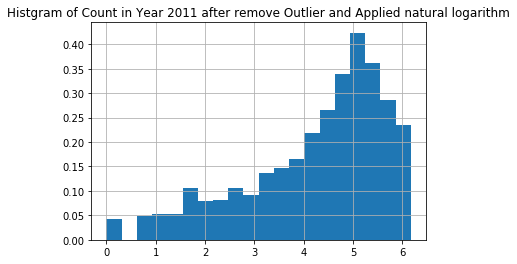

In [555]:
log_year_1=np.log(new_hour_year_1.cnt).hist(bins=20,normed= True)
plt.title('Histgram of Count in Year 2011 after remove Outlier and Applied natural logarithm')

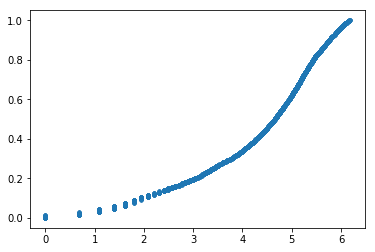

In [580]:
x11,y11 = ecdf(np.log(new_hour_year_1.cnt))
plt.plot(x11,y11,marker='.',linestyle='none')

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'ECDF')

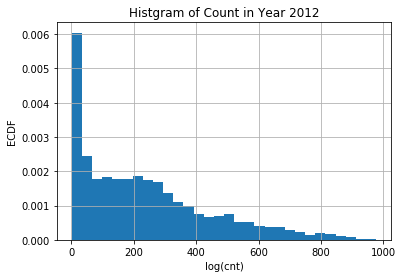

In [585]:
hour_year_2.cnt.hist(bins = 30,normed = True)
plt.title('Histgram of Count in Year 2012')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

Text(0, 0.5, 'ECDF')

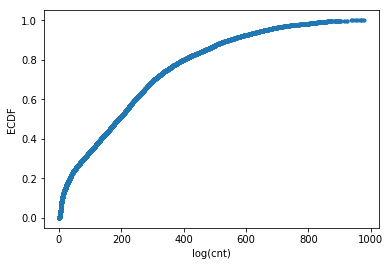

In [584]:
x2,y2 = ecdf(hour_year_2.cnt)
plt.plot(x2,y2,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [396]:
#Remove Outlier
IQR2 = hour_year_2.cnt.quantile(q=0.75, interpolation='linear')-hour_year_2.cnt.quantile(q=0.25, interpolation='linear')
lower_outlier_2 =  hour_year_2.cnt.quantile(q=0.25, interpolation='linear') - 1.5* IQR2
higher_outlier_2 =  hour_year_2.cnt.quantile(q=0.75, interpolation='linear') + 1.5* IQR2
new_hour_year2=hour_year_2[hour_year_2.cnt>lower_outlier_2]
new_hour_year_2 = new_hour_year2[hour_year_2.cnt<higher_outlier_2]


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2012 after remove Outlier and Applied natural logarithm')

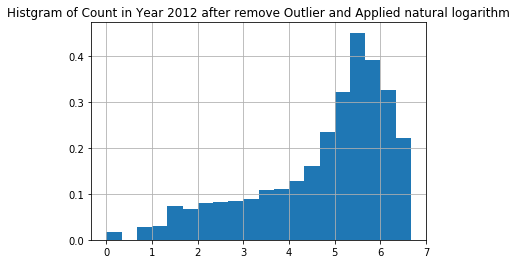

In [556]:
log_year_2=np.log(new_hour_year_2.cnt).hist(bins=20,normed=True)
plt.title('Histgram of Count in Year 2012 after remove Outlier and Applied natural logarithm')

Text(0, 0.5, 'ECDF')

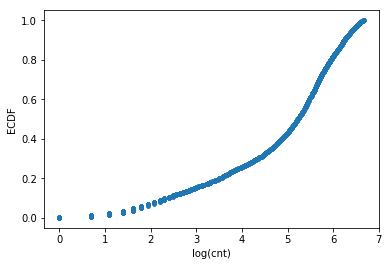

In [583]:
x22,y22 = ecdf(np.log(new_hour_year_2.cnt))
plt.plot(x22,y22,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [238]:
# Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

In [ ]:
monthly_avg_year1 = []
monthly_avg_year2 = []
for i in range(12):
    monthly_avg_year1.append(np.sum(hour[hour.yr == 0 ] [hour.mnth == (i+1)].cnt)/len(hour[hour.yr == 0 ] [hour.mnth == (i+1)]))
    monthly_avg_year2.append(np.sum(hour[hour.yr == 1 ] [hour.mnth == (i+1)].cnt)/len(hour[hour.yr == 1 ] [hour.mnth == (i+1)]))
    
    

Text(0.5, 1.0, 'Monthly Average Count in 2011')

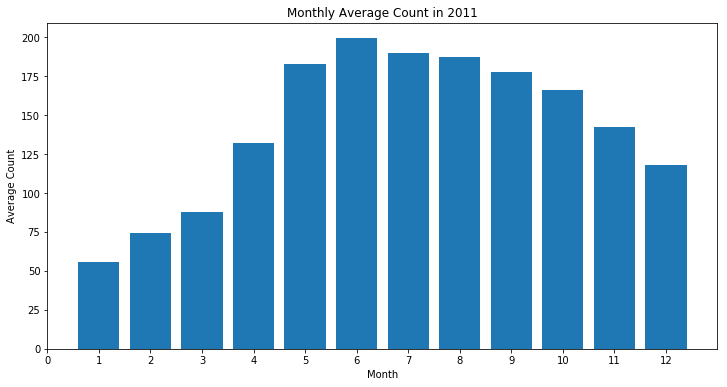

In [290]:
import pandas as pd
monthly_avg_data = pd.DataFrame({'year_2011':monthly_avg_year1,'year_2012':monthly_avg_year2})
plt.figure(figsize=(12,6))
plt.bar(monthly_avg_data.index+1,monthly_avg_data.year_2011)
plt.xticks(np.arange(0, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Monthly Average Count in 2011')

Text(0.5, 1.0, 'Monthly Average Count in 2012')

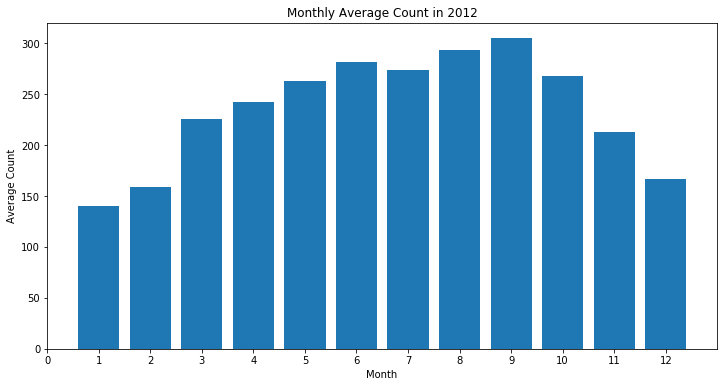

In [289]:
plt.figure(figsize=(12,6))
plt.bar(monthly_avg_data.index+1,monthly_avg_data.year_2012)
plt.xticks(np.arange(0, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Monthly Average Count in 2012')

In [ ]:
hourly_avg_year1 = []
hourly_avg_year2 = []
for i in range(4):
    for j in range(24):
        hourly_avg_year1.append(np.sum(hour[hour.yr == 0 ] [hour.season == (i+1)][hour.hr==j].cnt)/len(hour[hour.yr == 0 ] [hour.season == (i+1)][hour.hr==j]))
        hourly_avg_year2.append(np.sum(hour[hour.yr == 1 ] [hour.season == (i+1)][hour.hr==j].cnt)/len(hour[hour.yr == 1 ] [hour.season == (i+1)][hour.hr==j]))


In [309]:
year1 = pd.DataFrame({'Spring':hourly_avg_year1[0:24],'Summer':hourly_avg_year1[24:48],'Fall':hourly_avg_year1[48:72],'Winter':hourly_avg_year1[72:96]})
year2 = pd.DataFrame({'Spring':hourly_avg_year2[0:24],'Summer':hourly_avg_year2[24:48],'Fall':hourly_avg_year2[48:72],'Winter':hourly_avg_year2[72:96]})                               


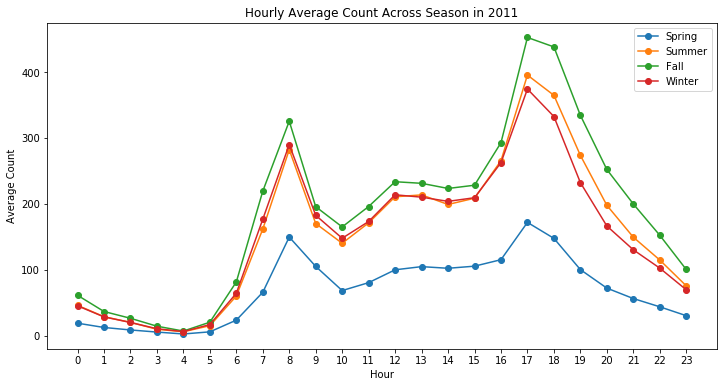

In [320]:
plt.figure(figsize=(12,6))
plt.plot(year1.index,year1.Spring,'-o')
plt.plot(year1.index,year1.Summer,'-o')
plt.plot(year1.index,year1.Fall,'-o')
plt.plot(year1.index,year1.Winter,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Season in 2011')
plt.legend()

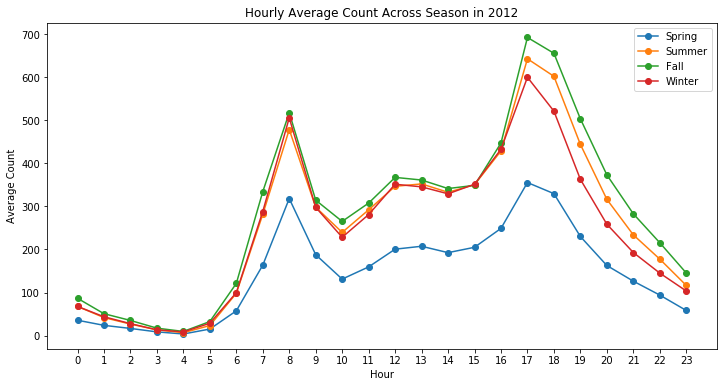

In [319]:
plt.figure(figsize=(12,6))
plt.plot(year1.index,year2.Spring,'-o')
plt.plot(year1.index,year2.Summer,'-o')
plt.plot(year1.index,year2.Fall,'-o')
plt.plot(year1.index,year2.Winter,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Season in 2012')
plt.legend()

In [ ]:
hourly_avg_weekday_year1 = []
hourly_avg_weekday_year2 = []
for i in range(7):
    for j in range(24):
        hourly_avg_weekday_year1.append(np.sum(hour[hour.yr == 0 ] [hour.weekday == (i)][hour.hr==j].cnt)/len(hour[hour.yr == 0 ] [hour.weekday == (i)][hour.hr==j]))
        hourly_avg_weekday_year2.append(np.sum(hour[hour.yr == 1 ] [hour.weekday == (i)][hour.hr==j].cnt)/len(hour[hour.yr == 1 ] [hour.weekday == (i)][hour.hr==j]))


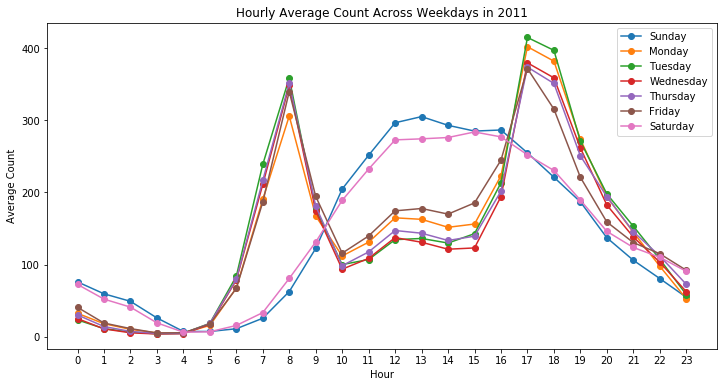

In [332]:
weekday_year1 = pd.DataFrame({'Sunday':hourly_avg_weekday_year1[0:24],'Monday':hourly_avg_weekday_year1[24:48],'Tuesday':hourly_avg_weekday_year1[48:72],'Wednesday':hourly_avg_weekday_year1[72:96],'Thursday':hourly_avg_weekday_year1[96:120],'Friday':hourly_avg_weekday_year1[120:144],'Saturday':hourly_avg_weekday_year1[144:168]})
weekday_year2 = pd.DataFrame({'Sunday':hourly_avg_weekday_year2[0:24],'Monday':hourly_avg_weekday_year2[24:48],'Tuesday':hourly_avg_weekday_year2[48:72],'Wednesday':hourly_avg_weekday_year2[72:96],'Thursday':hourly_avg_weekday_year2[96:120],'Friday':hourly_avg_weekday_year2[120:144],'Saturday':hourly_avg_weekday_year2[144:168]})

plt.figure(figsize=(12,6))
plt.plot(weekday_year1.index,weekday_year1.Sunday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Monday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Tuesday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Wednesday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Thursday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Friday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Saturday,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Weekdays in 2011')
plt.legend()

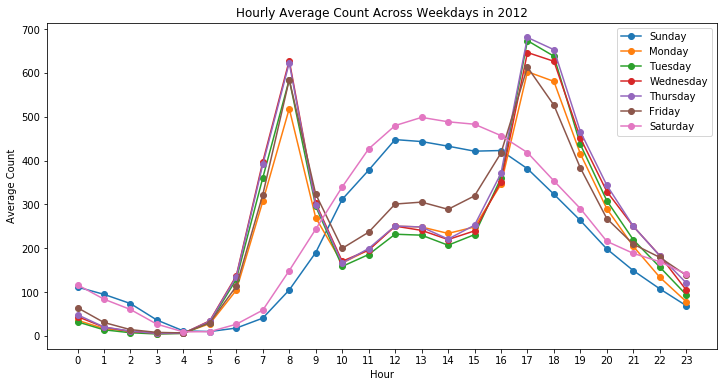

In [333]:
plt.figure(figsize=(12,6))
plt.plot(weekday_year2.index,weekday_year2.Sunday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Monday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Tuesday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Wednesday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Thursday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Friday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Saturday,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Weekdays in 2012')
plt.legend()

In [ ]:
hourly_avg_user_year1 = []
hourly_avg_user_year2 = []

for i in range(24):
    hourly_avg_user_year1.append(np.sum(hour[hour.yr == 0 ][hour.hr==i].casual)/len(hour[hour.yr == 0][hour.hr==j]))
    hourly_avg_user_year2.append(np.sum(hour[hour.yr == 1 ][hour.hr==i].casual)/len(hour[hour.yr == 1][hour.hr==j]))
for j in range(24):
    hourly_avg_user_year1.append(np.sum(hour[hour.yr == 0 ][hour.hr==j].registered)/len(hour[hour.yr == 0][hour.hr==j]))
    hourly_avg_user_year2.append(np.sum(hour[hour.yr == 1 ][hour.hr==j].registered)/len(hour[hour.yr == 1][hour.hr==j]))



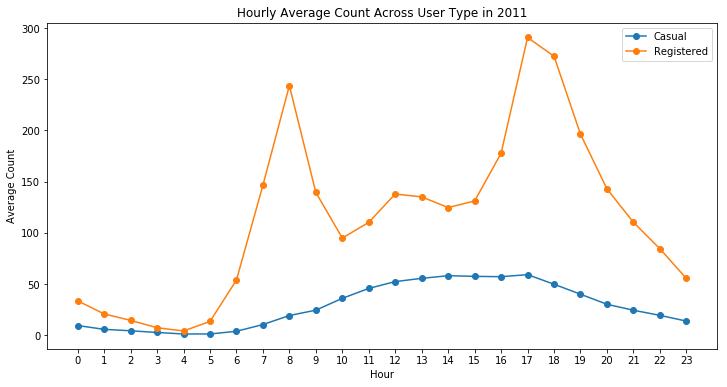

In [352]:
hourly_user_year1 = pd.DataFrame({'Casual':hourly_avg_user_year1[0:24],'Registered':hourly_avg_user_year1[24:48]})
hourly_user_year2 = pd.DataFrame({'Casual':hourly_avg_user_year2[0:24],'Registered':hourly_avg_user_year2[24:48]})


plt.figure(figsize=(12,6))
plt.plot(hourly_user_year1.index,hourly_user_year1.Casual,'-o')
plt.plot(hourly_user_year1.index,hourly_user_year1.Registered,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across User Type in 2011')
plt.legend()

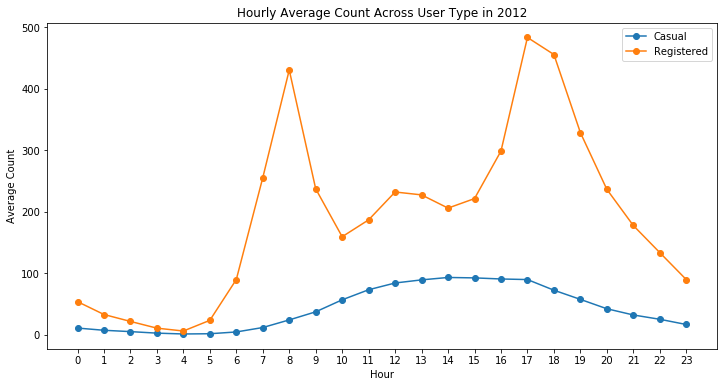

In [354]:
plt.figure(figsize=(12,6))
plt.plot(hourly_user_year2.index,hourly_user_year2.Casual,'-o')
plt.plot(hourly_user_year2.index,hourly_user_year2.Registered,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across User Type in 2012')
plt.legend()

In [500]:
wind_speed_acc = np.unique(hour.windspeed)
wind_speed=np.unique(round(hour.windspeed,3))
length = len(wind_speed)

In [501]:
speed_count = []
for i in range(length):
    speed_count.append(len(hour.windspeed[hour.windspeed==wind_speed_acc[i]]))

In [502]:
wind_speed

array([0.   , 0.09 , 0.104, 0.134, 0.164, 0.194, 0.224, 0.254, 0.284,
       0.298, 0.328, 0.358, 0.388, 0.418, 0.448, 0.463, 0.492, 0.522,
       0.552, 0.582, 0.612, 0.642, 0.657, 0.687, 0.716, 0.746, 0.776,
       0.806, 0.836, 0.851])

In [503]:
speed_count=np.array(speed_count)

In [504]:
wind_speed_df = pd.DataFrame({'wind_speed':wind_speed,'speed_count':speed_count})

Text(0, 0.5, 'Count')

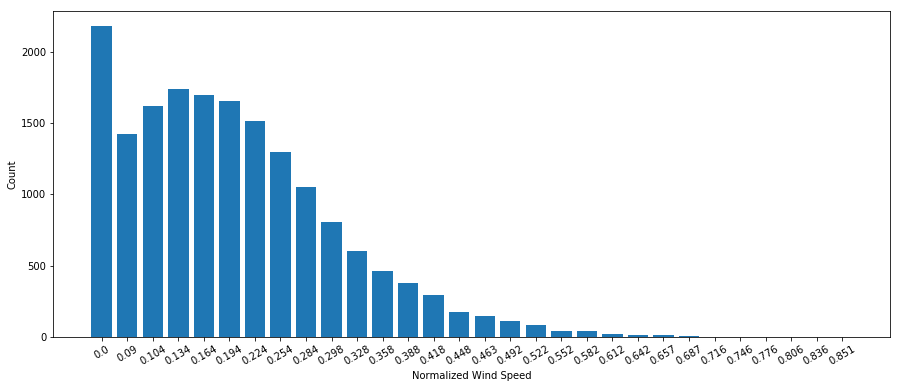

In [545]:
plt.figure(figsize=(15,6))
y_pos = np.arange(len(wind_speed_df.wind_speed))
plt.bar(y_pos,wind_speed_df.speed_count)
plt.xticks(y_pos,wind_speed,rotation=30 )
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Count')


In [529]:
from sklearn.ensemble import RandomForestClassifier
wCol= ["season","weathersit","hum","mnth","temp","yr","atemp"]
dataWind0 = hour[hour["windspeed"]==0]
dataWindNot0 = hour[hour["windspeed"]!=0]
dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
rfModel_wind = RandomForestClassifier()
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
dataWind0["windspeed"] = wind0Values
hour = dataWindNot0.append(dataWind0)
hour["windspeed"] = hour["windspeed"].astype("float")
hour.reset_index(inplace=True)
hour.drop('index',inplace=True,axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0, 0.5, 'Count')

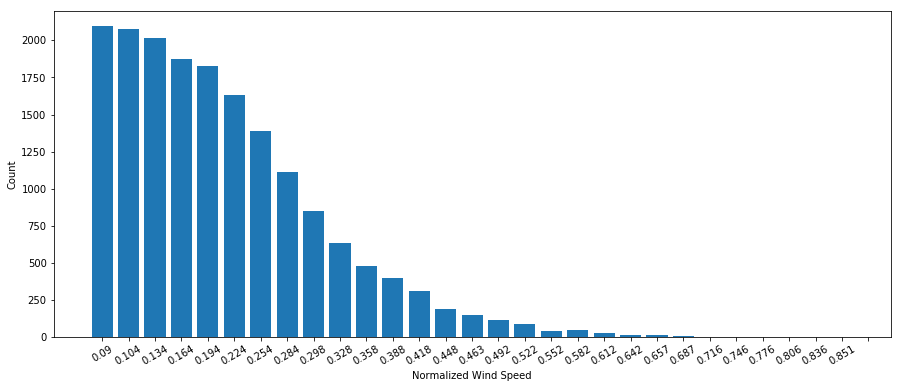

In [546]:
wind_speed_acc_fix = np.unique(hour.windspeed)
wind_speed_fix=np.unique(round(hour.windspeed,3))
length1 = len(wind_speed_fix)
speed_count_fix = []
for j in range(length1):
    speed_count_fix.append(len(hour.windspeed[hour.windspeed==wind_speed_acc_fix[j]]))
speed_count_fix=np.array(speed_count_fix)
wind_speed_df_fix = pd.DataFrame({'wind_speed_fix':wind_speed_fix,'speed_count_fix':speed_count_fix})
plt.figure(figsize=(15,6))
y_pos_fix = np.arange(len(wind_speed_df_fix.wind_speed_fix))
plt.bar(y_pos_fix,wind_speed_df_fix.speed_count_fix)
plt.xticks(y_pos,wind_speed_fix,rotation=30 )
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Count')

In [549]:
hour_year_1_fix = hour[hour.yr == 0].reset_index(drop=True)
hour_year_2_fix = hour[hour.yr == 1].reset_index(drop=True)

Text(0.5, 1.0, 'Correlation Matrix of Year 2011')

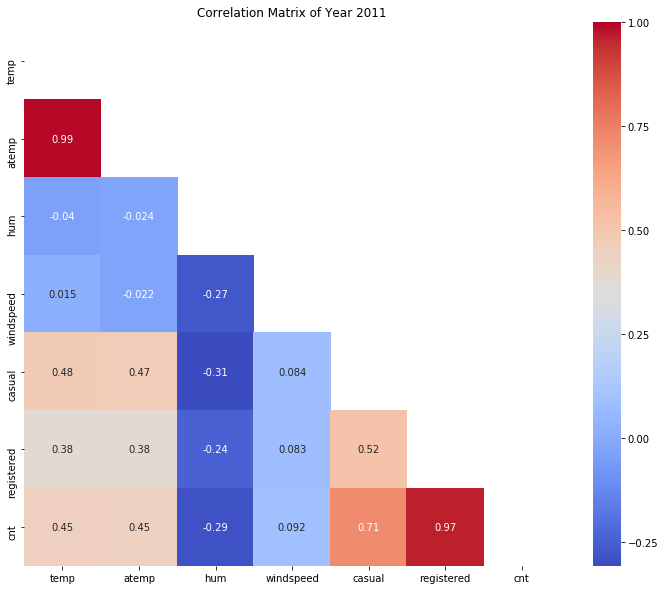

In [557]:
corr = hour_year_1_fix.drop(['instant','yr','mnth','hr','weekday','season','holiday','workingday','weathersit'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.title('Correlation Matrix of Year 2011')

Text(0.5, 1.0, 'Correlation Matrix of Year 2012')

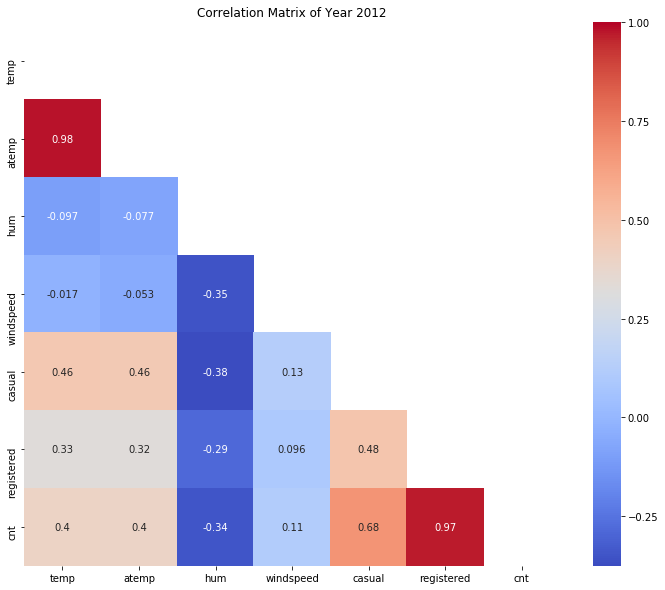

In [558]:
corr = hour_year_2_fix.drop(['instant','yr','mnth','hr','weekday','season','holiday','workingday','weathersit'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.title('Correlation Matrix of Year 2012')

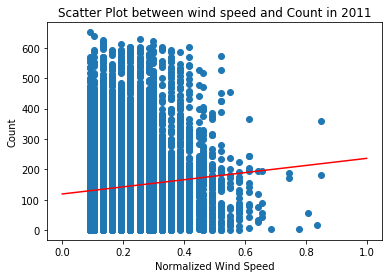

In [571]:
plt.scatter('windspeed','cnt',data=hour_year_1_fix)
a, b = np.polyfit(hour_year_1_fix.windspeed,hour_year_1_fix.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
_ = plt.title('Scatter Plot between wind speed and Count in 2011')
plt.show()

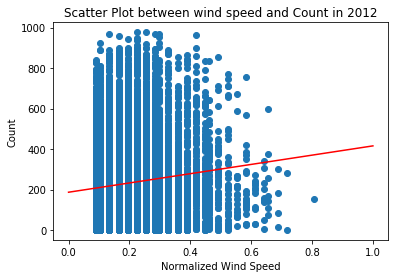

In [572]:
plt.scatter('windspeed','cnt',data=hour_year_2_fix)
a, b = np.polyfit(hour_year_2_fix.windspeed,hour_year_2_fix.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
_ = plt.title('Scatter Plot between wind speed and Count in 2012')
plt.show()

In [587]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
1,11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36
2,12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
3,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84
4,14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94
